
<img src="https://www.unad.edu.co/images/footer/logo-unad-acreditacion-min.png" width="780" height="140" align="right"/>

<p align="center">Curso:Machine Learning</p>

<p align="center"> Código Curso: 203008067 </p>

<p align="center"> Grupo: 7 </p>

 <p align="center"> Fase 5 - Prueba Objetiva Abierta</p>

 <p align="center">  Presentado por: Juan José García Sánchez</p>

<p align="center"> Código: 1703</p>

 <p align="center">  Tutor(a): Isaac Camargo Freile </p>

 <p align="center"> 17/07/2024</p>

 <p align="center"> UNIVERSIDAD NACIONAL ABIERTA Y A DISTANCIA - UNAD </p>



# Importar librerias

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#las funciones definidas aqui se usaran mas adelantes en el ejercicio, son para calcular metricas y graficar

def mostrar_metricas(y_real, y_predicho, decimales = 4):
    
    mse = metrics.mean_squared_error(y_real, y_predicho)
    rmse = np.sqrt(mse)
    r2 = metrics.r2_score(y_real, y_predicho)
    mae =  metrics.mean_absolute_error(y_real, y_predicho)
    print(
    f"R2  : {r2:.{decimales}f}",
    f"MSE : {mse:.{decimales}f}",
    f"RMSE: {rmse:.{decimales}f}",
    f"MAE : {mae:.{decimales}f}",
    sep = "\n",
    )


def matriz_confusion(y_real, y_predicho):
    matriz = metrics.confusion_matrix(y_real, y_predicho)
    heatmap(matriz, "Matriz Confusion", "d")
    ax = plt.gca()
    ax.set_xlabel("Valor Predicho")
    ax.set_ylabel("Valor Real")


def heatmap(matriz, titulo, formato=".2f", tamaño = (4, 4), mapa="Reds"):
    plt.figure(figsize=tamaño)
    sns.heatmap(matriz, annot=True, cmap=mapa, fmt=formato)
    plt.title(titulo)

#funcion para obtener el nivel de productividad

#funcion para calcular nivel productividad (productividad alta: 1; productividad baja: 0)
obtener_nivel = lambda array: np.where(array > 0.7, 1, 0)

# Limpieza de datos

In [1]:
# Carga los datos en un dataframe de Pandas

#limpiado de datos, el archivo csv debe estar en el mismo directorio
df_crudo = pd.read_csv('Anexo 1- Base de Datos dynamic_pricing')

df_crudo.drop_duplicates()

#limpieza hecha para los tres modelos: modelo lineal, logistico, y knn. se elimina la columna "wip"
df_modelos = df_crudo.dropna(axis=1)

NameError: name 'pd' is not defined

In [7]:
 df_modelos.describe()

,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [46]:
df_arbol_crudo.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

In [13]:
binarize(df_modelos["actual_productivity"].values.reshape(-1,1), threshold=0.7)

array([[1.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]])

# Cargue, separacion y analisis de datos

In [14]:
#separando campos necesarios para entrenamiento

caracteristicas = ["no_of_workers", "over_time"]

prep_num = ColumnTransformer([('escalado', MinMaxScaler(), caracteristicas),],
                  remainder= 'drop')

df_entre = df_modelos[caracteristicas + ["actual_productivity"]]

df_entre["nivel_productividad"] = Binarizer(df_modelos["actual_productivity"], threshold=0.7)


# Dividir los datos en conjuntos de entrenamiento y prueba (por ejemplo, 70% entrenamiento y 30% prueba)
X_entre, X_prueba, nivel_entre, nivel_prueba = train_test_split(df_entre[caracteristicas],
                                                        df_entre["nivel_productividad"], 
                                                        train_size=0.7, 
                                                        random_state=42)


C:\Users\frajg\AppData\Local\Temp\ipykernel_14068\4151940208.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_entre["nivel_productividad"] = binarize(df_modelos["actual_productivity"].values.reshape(-1,1), threshold=0.7)


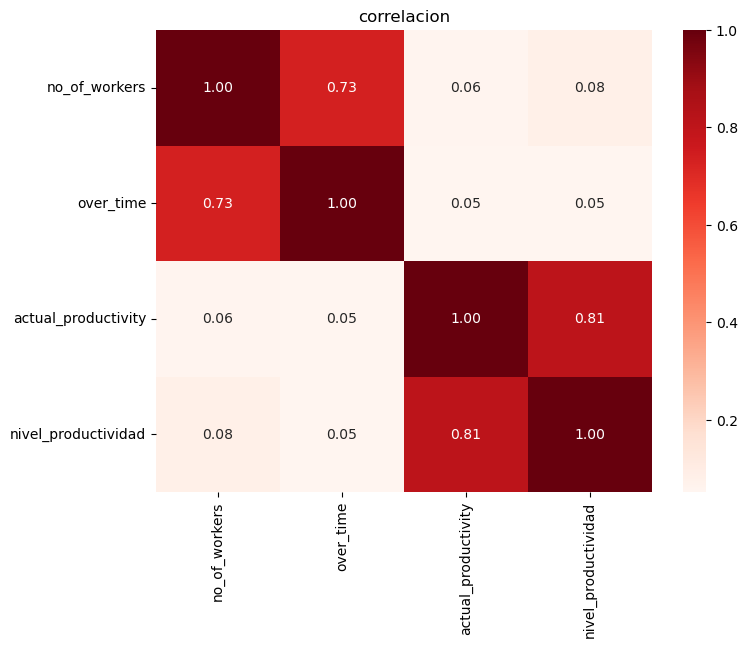

In [15]:
matriz_correlacion = df_entre.corr()
# matriz de correlacion entre variables
heatmap(matriz_correlacion.abs(), "correlacion", ".2f", (8,6))

# Modelo Logístico.

- a. Construir la variable ‘nivel_productividad’ con niveles alto y bajo. Considere nivel alto a productividad real > 0.7 y nivel bajo a productividad real <=0.7.
- b. Con la base de entrenamiento aplicar un modelo de regresión logística para predecir el ‘nivel_productividad’ basado en el número de trabajadores de cada equipo y el tiempo extra en minutos.
- c. Realizar las predicciones sobre la base de prueba. Calcule la precisión (accuracy) sobre los datos de prueba.

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
#construyendo las variables para el nivel de produtividad (productividad alta: 1; productividad baja: 0)

modelo_log = Pipeline([
    ("preprocesamiento", prep_num),
    ("logistico", LogisticRegression())
])

modelo_log.fit(X_entre, nivel_entre)

Pipeline(steps=[('preprocesamiento',
                 ColumnTransformer(transformers=[('escalado', MinMaxScaler(),
                                                  ['no_of_workers',
                                                   'over_time'])])),
                ('logistico', LogisticRegression())])

In [24]:
#coeficientes
modelo_log.named_steps["logistico"].coef_

array([[ 0.45387304, -0.01670841]])

In [25]:
nivel_entre_pred = modelo_log.predict(X_entre)
nivel_prueba_pred = modelo_log.predict(X_prueba)

 ## Prueba del Modelo

In [26]:
acc_entre = metrics.accuracy_score(nivel_entre, nivel_entre_pred)
acc_prueba = metrics.accuracy_score(nivel_prueba, nivel_prueba_pred)

print(f"exactitud entrenamiento: {acc_entre:0.3f}", )
print(f"exactitud prueba: {acc_prueba:0.3f}")

exactitud entrenamiento: 0.691
exactitud prueba: 0.703


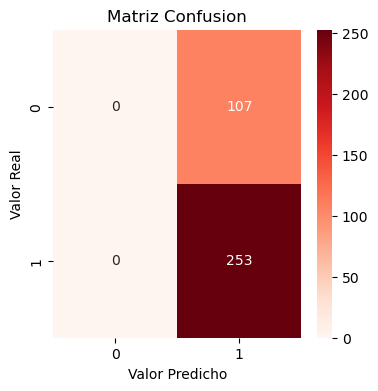

In [27]:
matriz_confusion(nivel_prueba, nivel_prueba_pred)

In [28]:
print(metrics.classification_report(nivel_prueba, nivel_prueba_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       107
         1.0       0.70      1.00      0.83       253

    accuracy                           0.70       360
   macro avg       0.35      0.50      0.41       360
weighted avg       0.49      0.70      0.58       360



C:\Users\frajg\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\frajg\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\frajg\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Aplicación K-NN.

- a. Con la base de entrenamiento, aplicar un modelo KNN de aprendizaje automático que pueda aprender del número de trabajadores de cada equipo y el tiempo extra en minutos, para predecir “nivel_productividad”.
- b. Realizar las predicciones sobre la base de prueba. Calcule la precisión (accuracy) sobre los datos de prueba.

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
# Entrenar el modelo con el mejor valor de k

modelo_knn = Pipeline([
    ("preprocesamiento", prep_num),
    ("logistico", KNeighborsClassifier(n_neighbors=5))
])

modelo_knn.fit(X_entre, nivel_entre)

Pipeline(steps=[('preprocesamiento',
                 ColumnTransformer(transformers=[('escalado', MinMaxScaler(),
                                                  ['no_of_workers',
                                                   'over_time'])])),
                ('logistico', KNeighborsClassifier())])

In [32]:
nivel_entre_knn_pred = modelo_knn.predict(X_entre)
nivel_prueba_knn_pred = modelo_knn.predict(X_prueba)

 ## Prueba del Modelo

In [33]:
acc_entre = metrics.accuracy_score(nivel_entre, nivel_entre_knn_pred)
acc_prueba = metrics.accuracy_score(nivel_prueba, nivel_prueba_knn_pred)

print(f"precision entrenamiento: {acc_entre:0.3f}", )
print(f"precision prueba: {acc_prueba:0.3f}")


precision entrenamiento: 0.754
precision prueba: 0.692


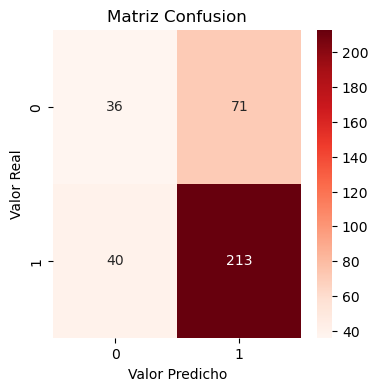

In [34]:
matriz_confusion(nivel_prueba, nivel_prueba_knn_pred)

In [35]:
print(metrics.classification_report(nivel_prueba, nivel_prueba_knn_pred))

              precision    recall  f1-score   support

         0.0       0.47      0.34      0.39       107
         1.0       0.75      0.84      0.79       253

    accuracy                           0.69       360
   macro avg       0.61      0.59      0.59       360
weighted avg       0.67      0.69      0.67       360



# Aplicación Árboles de decisión (CART).

- a. Con la base de entrenamiento, aplicar un modelo de árboles de decisión para distinguir “nivel_productividad” bajo y alto usando todas las características.
- b. Usando la función graphviz() visualizar el diagrama de árbol.
- c. Realizar las predicciones sobre la base de prueba. Calcule la precisión (accuracy) sobre los datos de prueba.

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
from sklearn import tree
import graphviz

In [61]:
#definir el nivle de productivad, con la funcion de nivel

carac_numericas = ['smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'targeted_productivity']

carac_categoricas = ['quarter', 'day']

caracteristicas = carac_numericas + carac_categoricas + ["team"]

prep_arbol = ColumnTransformer([
    ("numericas", MinMaxScaler(), carac_numericas),
    ("categoricas", OneHotEncoder(), carac_categoricas),
    ("equipo", OrdinalEncoder(), "team")]
)

df_arbol = df_arbol_crudo[caracteristicas]

bin = Binarizer(threshold=0.7)

df_arbol["nivel_productividad"] = bin.fit_transform(df_arbol_crudo["actual_productivity"] )

X_entre_arbol, X_prueba_arbol, nivel_arbol_entre, nivel_arbol_prueba = train_test_split(
    df_arbol.drop('nivel_productividad',axis=1),
    df_arbol["nivel_productividad"], 
    train_size=0.7, 
    random_state=42)

df_arbol.head(5)

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [63]:
df_arbol["nivel_productividad"].__class__


KeyError: 'nivel_productividad'

In [54]:
# Creación del modelo, profundiad de 5, algoritmo gini

modelo_dt = Pipeline([
    ("preprocesamiento", prep_arbol),
    ("arbol", DecisionTreeClassifier(
            max_depth         = 5,
            criterion         = 'gini',
            random_state      = 42
          ))
])

# Entrenamiento del modelo
modelo_dt.fit(X_entre_arbol, nivel_arbol_entre)

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [ ]:
LabelEncoder.fit_transform

In [161]:
nivel_entre_dt_pred = modelo_dt.predict(X_entre_arbol)
nivel_prueba_dt_pred = modelo_dt.predict(X_prueba_arbol)

 ## Prueba del Modelo

In [1]:
acc_entre = metrics.accuracy_score(nivel_arbol_entre, nivel_entre_dt_pred)
acc_prueba = metrics.accuracy_score(nivel_arbol_prueba, nivel_prueba_dt_pred)

print(f"exactitud entrenamiento: {acc_entre:0.3f}", )
print(f"exactitud prueba: {acc_prueba:0.3f}")

NameError: name 'metrics' is not defined

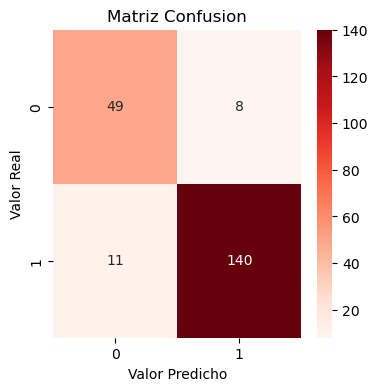

In [163]:
matriz_confusion(nivel_arbol_prueba, nivel_prueba_dt_pred)

In [164]:
print(metrics.classification_report(nivel_arbol_prueba, nivel_prueba_dt_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84        57
         1.0       0.95      0.93      0.94       151

    accuracy                           0.91       208
   macro avg       0.88      0.89      0.89       208
weighted avg       0.91      0.91      0.91       208



In [42]:
archivo = "tree.dot"

export_graphviz(modelo_dt, 
                out_file=archivo, 
                feature_names=X_prueba.columns, 
                class_names=["Prod Bajo", "Prod Alto"],
                rounded=True, filled=True)

with open(archivo, "r") as rf:
    dot_graph = rf.read()
    
grf = graphviz.Source(dot_graph, format="png")


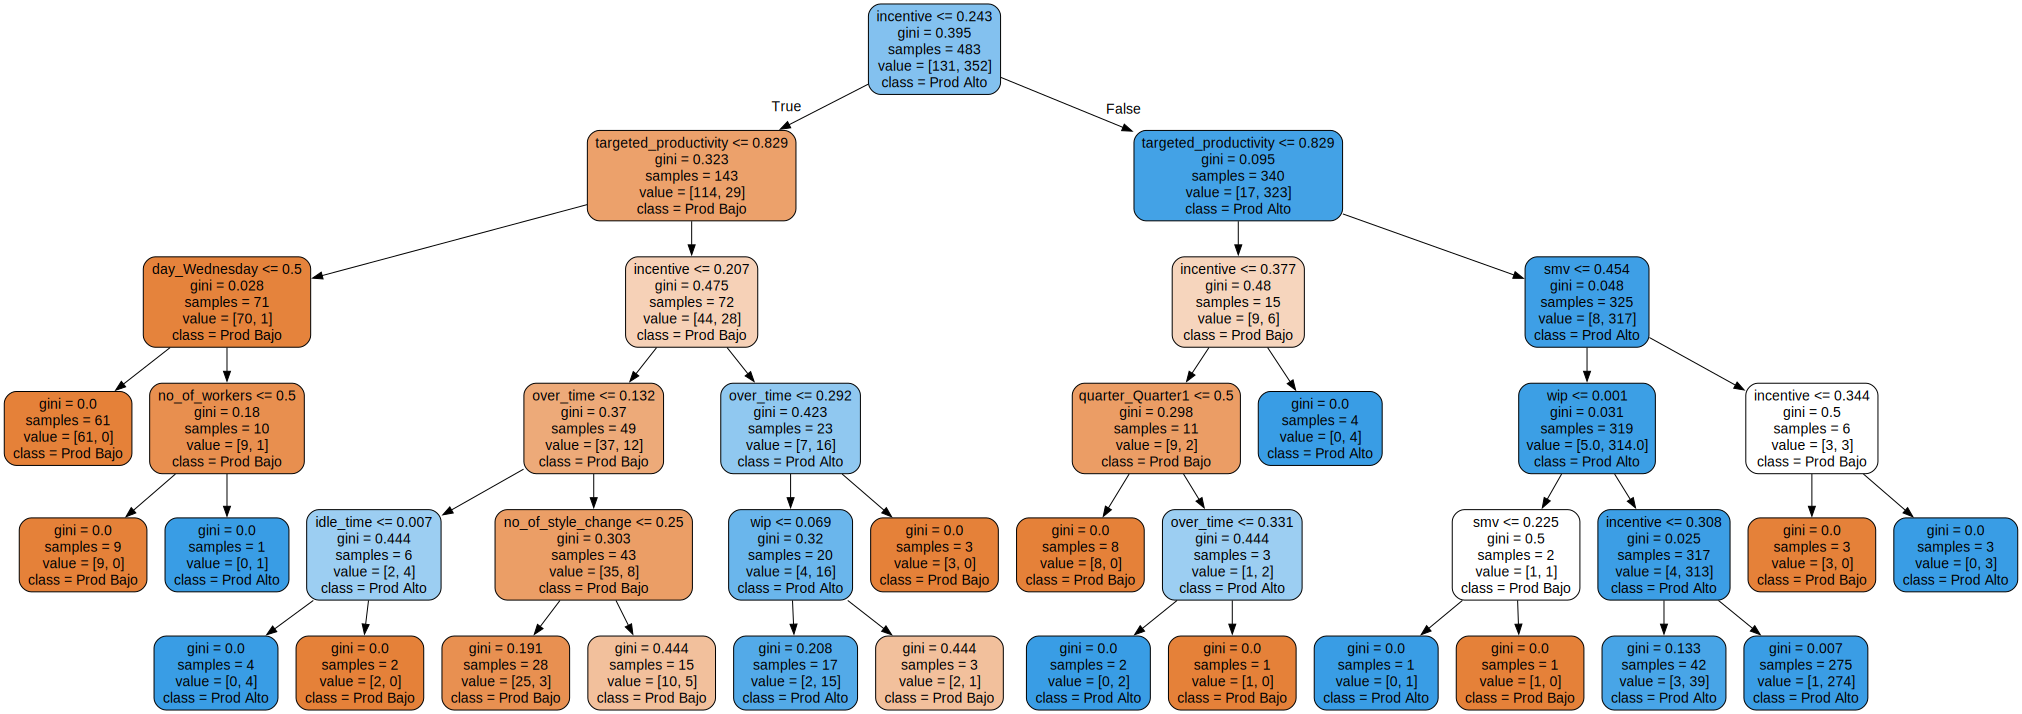

In [43]:
#visualizacion del arbol de decision
grf

# Referencias

- Kane, F. (2017). Hands-On Data Science and Python Machine Learning. Packt
Publishing. (pp. 183-195).
- Raschka, S., & Mirjalili, V. (2017). Python Machine Learning - Second Edition: Vol.
2nd ed. Packt Publishing. (pp. 90-103).